# **DIVE INTO CODE COURSE**
## **Natural language processing**
**Student Name**: Doan Anh Tien<br>
**Student ID**: 1852789<br>
**Email**: tien.doan.g0pr0@hcmut.edu.vn

### **[Problem 1] Learning/Estimation**

In [1]:
#Download IMDB to the current folder
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# Unzip
!tar zxf aclImdb_v1.tar.gz
# aclImdb / train / unsup is unlabeled and removed
!rm -rf aclImdb/train/unsup
# Show IMDB dataset description
!cat aclImdb/README

--2022-01-31 11:39:09--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  48.6MB/s    in 1.6s    

2022-01-31 11:39:11 (48.6 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an a

In [2]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

# Display of the correspondence between 0, 1 of the label and the meaning
print(train_review.target_names)

['neg', 'pos']


In [3]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [4]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()

df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


### **[Problem 1] Scratch implementation of BoW**

In [6]:
import numpy as np
import pandas as pd
import re

In [7]:
def retrieve_unigram(text):
  '''
  BoW implementation to return the table of unigram
  '''
  # Convert all character to lowercase
  lower_text = list(map(str.lower, text))

  unigram = list()

  for word in lower_text:
    unigram.append(re.findall(r'(?u)\b\w+\b', word))

  feature = list(set(np.concatenate(unigram).tolist()))

  print('Features:', feature)

  new_df = pd.DataFrame(index=range(len(lower_text)), columns=feature)

  for i, sentence in enumerate(unigram):
    for token in feature:
      df.loc[i, token] = sentence.count(token)

  return df

In [8]:
def retrieve_bigram(text):
  '''
  BoW implementation to return the table of bigram
  '''
  # Convert all character to lowercase
  lower_text = list(map(str.lower, text))

  n = 2
  bigram = list()

  for word in lower_text:
    seq = re.findall(r'(?u)\b\w+\b', word)
    bigram.append([seq[i] + " " + seq[i+n-1] for i in range(len(seq)-n+1)])

  feature = list(set(np.concatenate(bigram).tolist()))

  print('Features:', feature)

  new_df = pd.DataFrame(index=range(len(lower_text)), columns=feature)

  for i, sentence in enumerate(bigram):
    for token in feature:
      df.loc[i, token] = sentence.count(token)

  return df

In [9]:
sample_dataset = \
  ["This movie is SOOOO funny!!!",
  "What a movie! I never",
  "best movie ever!!!!! this movie"]

print("sample_dataset: \n")
display(sample_dataset)

print("1-gram dataframe:\n")
display(retrieve_unigram(sample_dataset))

print("2-gram dataframe:\n")
display(retrieve_bigram(sample_dataset))


sample_dataset: 



['This movie is SOOOO funny!!!',
 'What a movie! I never',
 'best movie ever!!!!! this movie']

1-gram dataframe:

Features: ['funny', 'is', 'ever', 'i', 'movie', 'never', 'what', 'this', 'soooo', 'best', 'a']


,a,bad,film,good,is,movie,this,very,funny,ever,i,never,what,soooo,best
0,0,0,0,1,1,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,1,1,0,1,0,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0,2,0,0,0,2,1,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0


2-gram dataframe:

Features: ['movie i', 'soooo funny', 'movie is', 'is soooo', 'this movie', 'i never', 'ever this', 'movie ever', 'what a', 'best movie', 'a movie']


,a,bad,film,good,is,movie,this,very,funny,ever,i,never,what,soooo,best,movie i,soooo funny,movie is,is soooo,this movie,i never,ever this,movie ever,what a,best movie,a movie
0,0,0,0,1,1,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1,1,0,1,0,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0,2,0,0,0,2,1,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


### TF-IDF

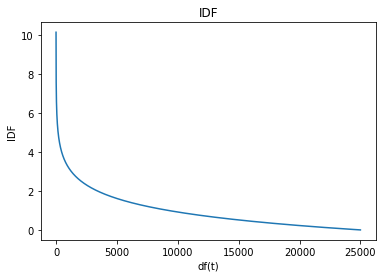

In [10]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

### Stop-word

In [11]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [12]:
# Download Stopword for the first time
import nltk
stop_words = nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', .

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',

In [13]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


### **[Problem 2] TF-IDF calculation**

In [14]:
print(x_train[0])

Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


From the sci-kit libraries, we can either use the TfidfVectorizer or use the pipeline of (CountVectorizer -> TfidfTransformer) to get the tf-idf matrix. In my exercises, I will try out both methods to see how they works and how can we configure the parameters.

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

**TfidfVectorizer**

In [16]:
print('Number of stop words:', len(stop_words))
vectorizer = TfidfVectorizer(use_idf=True, norm=None, stop_words=stop_words, max_features=5000)
X = vectorizer.fit_transform(x_train)

Number of stop words: 179


In [20]:
print("TF-IDF shape: {}\n".format(X.shape))
print("TF-IDF maxtrix:\n", X)
print("First 100 features:\n", vectorizer.get_feature_names_out()[0:100])

TF-IDF shape: (25000, 5000)

TF-IDF maxtrix:
   (0, 2158)	6.5519601245469765
  (0, 4444)	3.929235748953768
  (0, 2156)	5.008573905009011
  (0, 1769)	6.136238516271623
  (0, 3884)	2.1272987064582525
  (0, 2609)	5.117857917607764
  (0, 267)	3.279690120911571
  (0, 201)	3.2409657118073394
  (0, 1670)	6.561727200825109
  (0, 4045)	5.8536715444866125
  (0, 1920)	3.256887200520213
  (0, 1734)	3.1677330317010046
  (0, 1459)	6.769962276360768
  (0, 475)	5.3744465205179495
  (0, 111)	5.481224205407122
  (0, 2932)	6.541703624379787
  (0, 1606)	6.453842268588453
  (0, 4443)	10.275419372320991
  (0, 3436)	5.733043556697997
  (0, 3635)	5.4847640321122455
  (0, 114)	2.9318894646070004
  (0, 1737)	5.491881499881109
  (0, 4515)	2.051577880482202
  (0, 2907)	3.5424062846613
  (0, 1933)	3.728497010079894
  :	:
  (24999, 3233)	2.3906637184811412
  (24999, 902)	6.724750193199682
  (24999, 2053)	4.244233632052512
  (24999, 1739)	5.381809820659702
  (24999, 2708)	2.367159380933871
  (24999, 2607)	5.28362728

**CountVectorizer -> TfidfTransformer**

In [32]:
pipeline = Pipeline([('count', CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5000)),
                     ('tfidf', TfidfTransformer())]).fit(x_train)

bow_train = pipeline.transform(x_train)
# X2 = pipeline['tfidf'].idf_

print("TF-IDF shape: {}\n".format(bow_train.shape))
print("TF-IDF maxtrix:\n", bow_train)
print("First 100 features:\n", pipeline.get_feature_names_out()[0:100])

TF-IDF shape: (25000, 5000)

TF-IDF maxtrix:
   (0, 4995)	0.12299387773734474
  (0, 4989)	0.14775982928716647
  (0, 4988)	0.073749997926614
  (0, 4958)	0.04873317247356041
  (0, 4947)	0.07252762004139271
  (0, 4914)	0.03118361761803588
  (0, 4880)	0.06568278240059365
  (0, 4874)	0.04108218750019474
  (0, 4861)	0.13237496372643612
  (0, 4729)	0.27667474596994585
  (0, 4644)	0.09157126054864109
  (0, 4625)	0.1800642552968454
  (0, 4514)	0.09759330060272924
  (0, 4501)	0.047091271370817464
  (0, 4457)	0.11589707551661897
  (0, 4451)	0.042118521177405305
  (0, 4441)	0.10441990709887225
  (0, 4436)	0.06943357360317001
  (0, 4434)	0.02770544077861906
  (0, 4430)	0.10355450267902094
  (0, 4418)	0.09019043765982168
  (0, 4417)	0.23585873425248238
  (0, 4296)	0.2517910861667018
  (0, 4029)	0.1343633297275856
  (0, 3872)	0.04882934331943028
  :	:
  (24999, 651)	0.4159999785726642
  (24999, 621)	0.0567393277163489
  (24999, 610)	0.05717443101278493
  (24999, 580)	0.03796808867588593
  (24999, 498

### **[Problem 3] Learning using TF-IDF**

In [40]:
# Training labels
print(y_train.shape)

(25000,)


In [44]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=2, random_state=42).fit_predict(X)

In [45]:
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('confusion matrix = \n', confusion_matrix(y_test, clusters))
print('accuracy = ', accuracy_score(y_test, clusters))
print('precision = ', precision_score(y_test, clusters))
print('recall = ', recall_score(y_test, clusters))
print('f1 score = ', f1_score(y_test, clusters))

confusion matrix = 
 [[10049  2451]
 [10014  2486]]
accuracy =  0.5014
precision =  0.5035446627506583
recall =  0.19888
f1 score =  0.28514079256752883


In [47]:
vectorizer2 = TfidfVectorizer(use_idf=True, norm=None, stop_words=stop_words[:75], max_features=2500)
X2 = vectorizer2.fit_transform(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  % sorted(inconsistent)


In [48]:
clusters2 = KMeans(n_clusters=2, random_state=0).fit_predict(X2)

In [49]:
print('confusion matrix = \n', confusion_matrix(y_test, clusters))
print('accuracy = ', accuracy_score(y_test, clusters2))
print('precision = ', precision_score(y_test, clusters2))
print('recall = ', recall_score(y_test, clusters2))
print('f1 score = ', f1_score(y_test, clusters2))

confusion matrix = 
 [[10049  2451]
 [10014  2486]]
accuracy =  0.50192
precision =  0.505497022446175
recall =  0.17656
f1 score =  0.26170994900984224


### **[Problem 4] Scratch mounting of TF-IDF**

In [50]:
from math import log

In [60]:
def tf(term, d, type='standard'):
  '''
  Term-frequency calculation
  
  Term: token that appear in the sample d
  d: an sample from the corpus of text
  '''
  if type == 'standard':
    return d.count(term)/len(d)
  else:
    return d.count(term)


def idf(term, corpus, type='standard'):
  '''
  Term-frequency calculation
  
  Term: token that appear in the samplse of the corpus
  text: the corpus
  '''
  N = len(corpus)
  idf = 0

  for token in corpus:
    idf += 1 if term in token else 0 # Check if the term occurs in each sample of the corpus

  if type == 'standard':
    return log(N/idf)
  else:
    return log((N+1)/(idf+1)) + 1

def get_term(corpus):
  term_list = list()

  for word in corpus:
    term_list.append(re.findall(r'(?u)\b\w+\b', word))

  terms = list(set(np.concatenate(term_list).tolist()))

  return terms


def scratch_tfidf(corpus, type='standard'):
  lower_text = list(map(str.lower, corpus))
  text_list = list()

  terms = get_term(lower_text)

  for word in lower_text:
    text_list.append(re.findall(r'(?u)\b\w+\b', word))

  new_df = pd.DataFrame(index=range(len(lower_text)), columns=terms)

  for i, d in enumerate(text_list):
    for term in terms:
      tf_val = tf(term, d, type=type)
      idf_val = idf(term, text_list, type=type)
      new_df.loc[i, term] = tf_val * idf_val

  return new_df

In [61]:
df = scratch_tfidf(sample_dataset)
print(df)

      funny        is      ever  ...     soooo      best         a
0  0.219722  0.219722         0  ...  0.219722         0         0
1         0         0         0  ...         0         0  0.219722
2         0         0  0.219722  ...         0  0.219722         0

[3 rows x 11 columns]


In [62]:
df = scratch_tfidf(sample_dataset, type='sci')
print(df)

     funny       is     ever        i  ...     this    soooo     best        a
0  1.69315  1.69315        0        0  ...  1.28768  1.69315        0        0
1        0        0        0  1.69315  ...        0        0        0  1.69315
2        0        0  1.69315        0  ...  1.28768        0  1.69315        0

[3 rows x 11 columns]


**Word2Vec**

In [63]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # Set the number of dimensions to 10
model.build_vocab(sentences) # Preparation
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) #Learning

print("List of vocabulary : {}".format(model.wv.vocab.keys()))

for vocab in model.wv.vocab.keys():
  print("Vector of {}: \n{}".format(vocab, model.wv[vocab]))

List of vocabulary : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
Vector of this: 
[ 0.01621787 -0.00113688  0.01892975 -0.01404739 -0.01356943  0.00044165
  0.0045636   0.00837868 -0.01682562  0.01497222]
Vector of movie: 
[ 0.04078217  0.02701177  0.00075286 -0.0302626  -0.0146106   0.0286198
  0.04639368 -0.02204869  0.01707423 -0.0260492 ]
Vector of is: 
[-0.04805516 -0.04970117  0.01130225 -0.03118465  0.02001394  0.01405568
 -0.00493123  0.0472564  -0.00233951 -0.00410897]
Vector of very: 
[ 0.01696976 -0.00225817 -0.01421053  0.04711528 -0.01985045  0.02892782
  0.02093777  0.00079149 -0.01962063  0.0078568 ]
Vector of good: 
[ 0.00395159 -0.03180483  0.02971841  0.00797855 -0.03819173  0.02623869
  0.00136513 -0.00931955  0.01602231 -0.01167646]
Vector of film: 
[ 0.00913872  0.0019538  -0.00629359 -0.03273645  0.02914467 -0.00298643
 -0.01090179 -0.03266232 -0.02004246  0.0104669 ]
Vector of a: 
[-0.04033273  0.01210859  0.03924946 -0.04559183 -0.0052

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


**Word Distance**

In [64]:
model.wv.most_similar(positive="good", topn=3)

[('very', 0.2597092390060425),
 ('this', 0.20776838064193726),
 ('movie', 0.20472824573516846)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


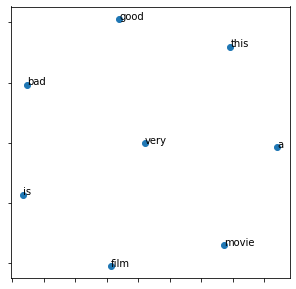

In [65]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocabs = model.wv.vocab.keys()

tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

### **[Problem 5] Corpus pretreatment**

In [72]:
x_train[22]

'Wow, this film was just bloody horrid. SO bad in fact that even though I didn\'t pay to see it, I still wanted my money back.<br /><br />The film is about nothing intelligible. It\'s a mish-mash of sci-fi cliche\'s that were done better by much more skilled film makers. The performances, especially by the leads were over the top in a less endearing Ed Wood sort of way. Speaking of Ed Wood, he\'d be proud of the character\'s dialogue. It\'s just too taciturn with no hint of irony or sense of humor. On top of that, it doesn\'t make sense, nor does the plot, or lackthereof.<br /><br />The visual effects are okay, but not enough to go "oh wow, that\'s cool" and they just seem to be thrown in to "be cool" rather than be a good plot device.<br /><br />The soundtrack was another mishmash of stuff that really never set any sort of mood. Again, it seemed as if the director was just throwing in songs in the film in an effort to "be cool".<br /><br />Which brings me to my final point. Perhaps if

In [73]:
import re

text1 = list(map(str.lower, x_train))

text2 = [doc.replace('<br />', '') for doc in text1]
print(text2[20])
text3 = [re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-]+', '', doc) for doc in text2]
print(text3[20])

this independent, b&w, dv feature consistently shocks, amazes and amuses with it's ability to create the most insane situations and then find humor and interest in them. it's all hilarious and ridiculous stuff, yet as absurd as much of the film should be, there is a heart and a reality here that keeps the film grounded, keeps the entire piece from drifting into complete craziness and therein lies the real message here. this film is about how we all survive in a world gone mad. that seems to be the heart of the film. for as insane and off the wall as things get, leon, the 30 yr. old paperboy-protagonist, always tries to keep it together. he's like a child forever trying to catch the balloon that is floating away so that everything will work out for the best, so that everyone can have what they want.the acting in the film could have went far over the top but the exceptional cast really keeps the piece cohesive. van meter is perhaps the best of the bunch here with a performance that shine

In [75]:
text4 = [re.findall(r'(?u)\b\w+\b', doc) for doc in text3]
print('Text length:', len(text4))

Text length: 25000


### **[Problem 6] Learning Word2Vec**

In [76]:
from gensim.models import Word2Vec
# sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # Set the number of dimensions to 10
model.build_vocab(text4) # Preparation
model.train(text4, total_examples=model.corpus_count, epochs=model.iter) #Learning

print("List of vocabulary : {}".format(model.wv.vocab.keys()))

for vocab in model.wv.vocab.keys():
  print("Vector of {}: \n{}".format(vocab, model.wv[vocab]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


Streaming output truncated to the last 5000 lines.
  0.00254069  0.03390249 -0.0852149  -0.02285835]
Vector of baccarat: 
[-0.05335771 -0.06511405  0.08460424  0.022455    0.03754763 -0.05962424
 -0.02294053 -0.05461479  0.02398104 -0.01417792]
Vector of motormouth: 
[-0.07043619 -0.10011205  0.07669102 -0.02534657  0.03339659 -0.02160324
  0.02171315  0.03436964 -0.02150035 -0.06093797]
Vector of ministrations: 
[-0.04762314 -0.03950861  0.04050034  0.01877429 -0.0027203  -0.02247764
 -0.09609223  0.02523557 -0.02730465  0.02318207]
Vector of fidget: 
[-0.04057458 -0.09009812  0.0478011   0.05794489  0.00337678  0.04515851
 -0.01912068 -0.05187572 -0.04502267  0.02102084]
Vector of talkd: 
[ 0.00479102 -0.02093279  0.01133982  0.06015682  0.00480313  0.02420691
 -0.04234129 -0.00068738 -0.0207301   0.02457588]
Vector of whathaveyous: 
[-0.02244262 -0.0452551   0.03644623  0.05384625 -0.02755204  0.02005055
  0.06586967 -0.07430697 -0.01761116  0.02407762]
Vector of injun: 
[-0.0358150